# Exploring Hosipital Data by Rurality


### Purpose:

Explore IRR and Hospitals data set.

### Data:

    Hospital Data (Homeland Infrastructure Foundation-Level Data (HIFLD))
    Rurality (Perdue)

### Environment:

    Current notebook OneDrive/UMN-Covid directory.
    Data is in /Data/ directory.
    Kernel is NLP under .virtualenvs/ directory.
   


In [1]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Data Preperation

In [4]:
# Read in Data
Hospitals = pd.read_csv('../Data/Hospitals.csv')
IRR_2010 = pd.read_csv('../Data/IRR_2010.csv')
IRR_2000 = pd.read_csv('../Data/IRR_2000.csv')

In [5]:
IRR_2010.sample(5)
IRR_2010.loc[IRR_2010['County Name'].str.contains('Cook')]

,FIPS2010,County Name,State,IRR2010
423,13075,Cook County,Georgia,0.51
608,17031,Cook County,Illinois,0.07
1327,27031,Cook County,Minnesota,0.63
2402,46087,McCook County,South Dakota,0.58
2569,48097,Cooke County,Texas,0.51


In [6]:
col_keep = ['ID', 'NAME', 'TYPE', 'STATUS', 'COUNTY', 
        'COUNTYFIPS', 'COUNTRY', 'NAICS_CODE', 'NAICS_DESC',
        'SOURCEDATE', 'VAL_DATE', 'OWNER', 'BEDS', 'TRAUMA', 'HELIPAD']
Hospitals_Trim = Hospitals[col_keep]
Hospitals_Trim.head()

,ID,NAME,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCEDATE,VAL_DATE,OWNER,BEDS,TRAUMA,HELIPAD
0,5793230,CENTRAL VALLEY GENERAL HOSPITAL,GENERAL ACUTE CARE,CLOSED,KINGS,06031,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2016/02/04 00:00:00,2014/02/10 00:00:00,PROPRIETARY,49,NOT AVAILABLE,N
1,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,GENERAL ACUTE CARE,OPEN,VENTURA,06111,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/08/08 00:00:00,2014/02/10 00:00:00,PROPRIETARY,62,NOT AVAILABLE,N
2,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,GENERAL ACUTE CARE,OPEN,LOS ANGELES,06037,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/08/08 00:00:00,2014/02/10 00:00:00,PROPRIETARY,127,NOT AVAILABLE,N
3,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,GENERAL ACUTE CARE,OPEN,LOS ANGELES,06037,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/08/08 00:00:00,2014/02/10 00:00:00,PROPRIETARY,100,NOT AVAILABLE,N
4,23691706,KINDRED HOSPITAL BALDWIN PARK,GENERAL ACUTE CARE,OPEN,LOS ANGELES,06037,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/08/08 00:00:00,2014/02/10 00:00:00,PROPRIETARY,95,NOT AVAILABLE,N


In [7]:
# FISP is a national standard and the codes should remain constant across
    # the different census data sets.  does this hold?

test_2000 = IRR_2000.loc[IRR_2000['FIPS2000'] == 17031]['County Name'].item() 
test_2010 = IRR_2010.loc[IRR_2010['FIPS2010'] == 17031]['County Name'].item()
test_hosp = Hospitals.loc[Hospitals['COUNTYFIPS'] == '17031']['COUNTY'].iloc[0]

# Note the dtype difference and the case difference in datasets

print('Counties are - 2000:',test_2000,' - 2010:',test_2010,' - Hospital:',test_hosp)

Counties are - 2000: Cook County  - 2010: Cook County  - Hospital: COOK


In [8]:
# merge the data sets and drop extra columns
IRR = IRR_2000.merge(IRR_2010[['FIPS2010','IRR2010']], left_on='FIPS2000', right_on='FIPS2010')
IRR.drop(['FIPS2010'], axis=1, inplace=True)

IRR['FIPS2000'] = IRR['FIPS2000'].astype(str)

merged = IRR.merge(Hospitals_Trim, left_on='FIPS2000', right_on='COUNTYFIPS')

In [9]:
merged.head()

,FIPS2000,County Name,State,IRR2000,IRR2010,ID,NAME,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCEDATE,VAL_DATE,OWNER,BEDS,TRAUMA,HELIPAD
0,10001,Kent County,Delaware,0.42,0.41,219901,BAYHEALTH KENT GENERAL HOSPITAL,GENERAL ACUTE CARE,OPEN,KENT,10001,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/08/14 00:00:00,2014/02/10 00:00:00,NON-PROFIT,236,LEVEL 3,Y
1,10001,Kent County,Delaware,0.42,0.41,319901,DOVER BEHAVIORAL HEALTH SYSTEM,PSYCHIATRIC,OPEN,KENT,10001,USA,622210,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,2018/08/14 00:00:00,2019/04/16 00:00:00,PROPRIETARY,52,NOT AVAILABLE,N
2,10003,New Castle County,Delaware,0.28,0.26,419720,MEADOW WOOD BEHAVIORAL HEALTH SYSTEM,PSYCHIATRIC,OPEN,NEW CASTLE,10003,USA,622210,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,2018/08/14 00:00:00,2019/04/16 00:00:00,PROPRIETARY,53,NOT AVAILABLE,N
3,10003,New Castle County,Delaware,0.28,0.26,1319713,ROCKFORD CENTER,PSYCHIATRIC,OPEN,NEW CASTLE,10003,USA,622210,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,2018/08/14 00:00:00,2019/04/16 00:00:00,PROPRIETARY,92,NOT AVAILABLE,N
4,10003,New Castle County,Delaware,0.28,0.26,619803,ALFRED I. DUPONT HOSPITAL FOR CHILDREN,GENERAL ACUTE CARE,OPEN,NEW CASTLE,10003,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/08/14 00:00:00,2014/02/10 00:00:00,NON-PROFIT,200,LEVEL 1 PEDIATRIC,Y


In [20]:
#save file
merged_open = merged[merged.STATUS == 'OPEN']
merged_open = merged_open[merged_open.BEDS!=(-999)]
merged_open.to_csv('../Generated_Files/Hospital_and_IRR.csv',index=False)


### Data Exploration

In [12]:
merged_open = merged[merged.STATUS == 'OPEN']
neg_beds = merged_open[merged_open.BEDS < 0]
neg_beds

,FIPS2000,County Name,State,IRR2000,IRR2010,ID,NAME,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCEDATE,VAL_DATE,OWNER,BEDS,TRAUMA,HELIPAD
9,10003,New Castle County,Delaware,0.28,0.26,173319805,WILMINGTON VA MEDICAL CENTER,MILITARY,OPEN,NEW CASTLE,10003,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/09/26 00:00:00,2019/05/09 00:00:00,NOT AVAILABLE,-999,NOT AVAILABLE,N
22,11001,District of Columbia,District of Columbia,0.10,0.10,175520422,WASHINGTON DC VA MEDICAL CENTER,MILITARY,OPEN,DISTRICT OF COLUMBIA,11001,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/09/26 00:00:00,2019/05/09 00:00:00,GOVERNMENT - FEDERAL,-999,NOT AVAILABLE,N
125,12033,Escambia County,Florida,0.36,0.35,15,NAVAL HOSPITAL PENSACOLA,MILITARY,OPEN,ESCAMBIA,12033,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2019/04/02 00:00:00,2015/07/24 00:00:00,GOVERNMENT - FEDERAL,-999,NOT AVAILABLE,Y
141,12057,Hillsborough County,Florida,0.26,0.24,82633607,ST JOSEPH'S WOMEN'S HOSPITAL,GENERAL ACUTE CARE,OPEN,HILLSBOROUGH,12057,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/08/15 00:00:00,2015/02/16 00:00:00,NON-PROFIT,-999,NOT AVAILABLE,Y
147,12057,Hillsborough County,Florida,0.26,0.24,4133637,JAMES A. HALEY VETERANS' HOSPITAL PRIMARY CARE...,MILITARY,OPEN,HILLSBOROUGH,12057,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/09/26 00:00:00,2015/05/18 00:00:00,GOVERNMENT - FEDERAL,-999,NOT AVAILABLE,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6219,55081,Monroe County,Wisconsin,0.50,0.50,15954660,VA MEDICAL CENTER - TOMAH,MILITARY,OPEN,MONROE,55081,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/09/26 00:00:00,2015/05/29 00:00:00,GOVERNMENT - FEDERAL,-999,NOT AVAILABLE,Y
6304,56015,Goshen County,Wyoming,0.58,0.58,3982240,ST JOSEPH'S CHILDREN'S HOME,PSYCHIATRIC,OPEN,GOSHEN,56015,USA,622210,"CHILDREN'S HOSPITALS, PSYCHIATRIC OR SUBSTANCE...",2018/08/13 00:00:00,2014/02/10 00:00:00,NON-PROFIT,-999,NOT AVAILABLE,N
6309,56021,Laramie County,Wyoming,0.49,0.49,16482001,VA MEDICAL CENTER - CHEYENNE,MILITARY,OPEN,LARAMIE,56021,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/09/26 00:00:00,2015/05/29 00:00:00,GOVERNMENT - FEDERAL,-999,NOT AVAILABLE,N
6314,56025,Natrona County,Wyoming,0.51,0.51,2182601,WYOMING RECOVER LLC,REHABILITATION,OPEN,NATRONA,56025,USA,622210,"HOSPITALS, SUBSTANCE ABUSE",2018/08/13 00:00:00,2014/03/12 00:00:00,PROPRIETARY,-999,NOT AVAILABLE,Y


In [13]:
# -999 seems to be the default for no value entered.  Remove this from the data set

merged_open = merged_open[merged_open.BEDS!=(-999)]
# merged_open[merged_open.BEDS < 0]

In [14]:
merged_open.dtypes

FIPS2000        object
County Name     object
State           object
IRR2000        float64
IRR2010        float64
ID               int64
NAME            object
TYPE            object
STATUS          object
COUNTY          object
COUNTYFIPS      object
COUNTRY         object
NAICS_CODE       int64
NAICS_DESC      object
SOURCEDATE      object
VAL_DATE        object
OWNER           object
BEDS             int64
TRAUMA          object
HELIPAD         object
dtype: object

In [15]:
merged_open[['IRR2000', 'IRR2010', 'NAICS_CODE', 'BEDS']] = merged_open[['IRR2000', 'IRR2010', 'NAICS_CODE', 'BEDS']].apply(pd.to_numeric)

merged_open.dtypes

FIPS2000        object
County Name     object
State           object
IRR2000        float64
IRR2010        float64
ID               int64
NAME            object
TYPE            object
STATUS          object
COUNTY          object
COUNTYFIPS      object
COUNTRY         object
NAICS_CODE       int64
NAICS_DESC      object
SOURCEDATE      object
VAL_DATE        object
OWNER           object
BEDS             int64
TRAUMA          object
HELIPAD         object
dtype: object

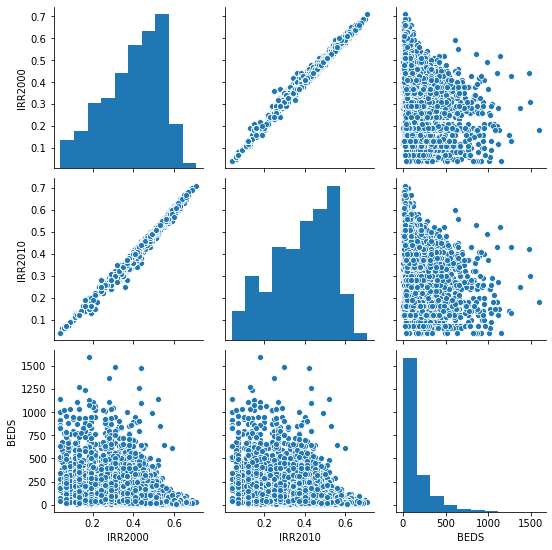

In [16]:
sns.pairplot(merged_open[['IRR2000','IRR2010', 'BEDS']])

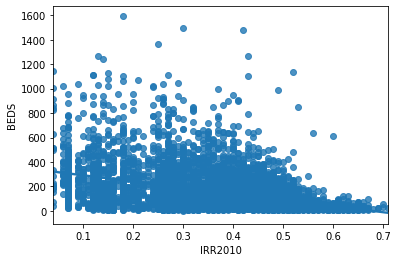

In [17]:
sns.regplot('IRR2010','BEDS',data=merged_open)

In [18]:
rural = merged_open.loc[merged_open['IRR2010']<=0.5]

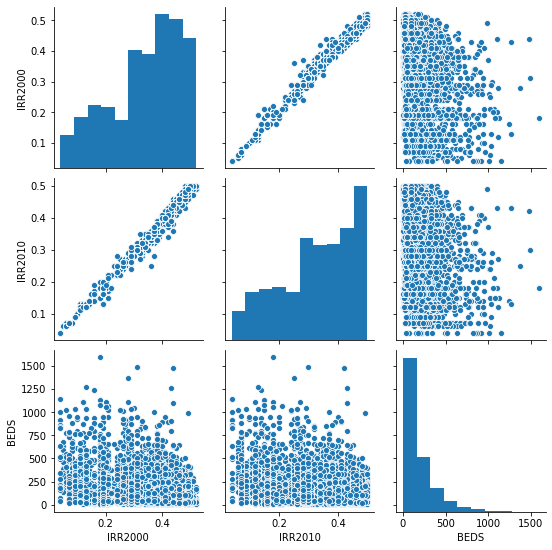

In [19]:
sns.pairplot(rural[['IRR2000','IRR2010', 'BEDS']])